# Tomato Leaf Disease Detection

## Importing the Libraries

In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

## Importing the Dataset

In [2]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '../input/tomato/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../input/tomato/New Plant Diseases Dataset(Augmented)/valid'

#### Inception V3

In [3]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [4]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# Folders in the Training Set
folders = glob('../input/tomato/New Plant Diseases Dataset(Augmented)/train/*')
folders

['../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold']

In [6]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Training Generator
training_set = train_datagen.flow_from_directory('../input/tomato/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [11]:
# Testing Generator
test_set = test_datagen.flow_from_directory('../input/tomato/New Plant Diseases Dataset(Augmented)/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [12]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
574/574 [==============================] - 366s 638ms/step - loss: 2.9954 - accuracy: 0.6825 - val_loss: 1.7402 - val_accuracy: 0.7983
Epoch 2/10
574/574 [==============================] - 331s 576ms/step - loss: 2.1001 - accuracy: 0.7902 - val_loss: 1.8492 - val_accuracy: 0.8200
Epoch 3/10
574/574 [==============================] - 336s 586ms/step - loss: 2.0816 - accuracy: 0.8179 - val_loss: 1.8422 - val_accuracy: 0.8362
Epoch 4/10
574/574 [==============================] - 352s 614ms/step - loss: 1.9099 - accuracy: 0.8448 - val_loss: 1.8611 - val_accuracy: 0.8462
Epoch 5/10
574/574 [==============================] - 344s 599ms/step - loss: 1.8932 - accuracy: 0.8517 - val_loss: 1.6369 - val_accuracy: 0.8681
Epoch 6/10
574/574 [==============================] - 328s 572ms/step - loss: 1.7254 - accuracy: 0.8693 - val_loss: 1.3779 - val_accuracy: 0.8866
Epoch 7/10
574/574 [==============================] - 310s 540ms/step - loss: 1.8463 - accuracy: 0.8692 - val_loss: 2.7200 -

## Visualize the model training by plotting Loss Function and Accuracy

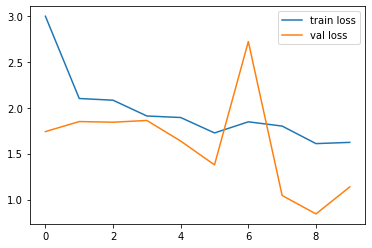

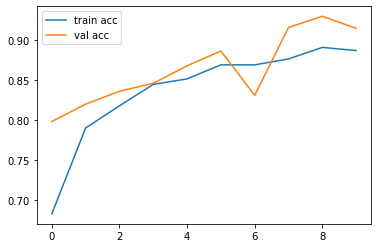

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [15]:
y_pred = model.predict(test_set)
y_pred

array([[2.2761736e-35, 1.0000000e+00, 4.9953767e-30, ..., 0.0000000e+00,
        2.4183147e-32, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5787742e-23, 1.0000000e+00, 3.9931668e-26, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.9600962e-31, 0.0000000e+00, 3.7623045e-30, ..., 0.0000000e+00,
        0.0000000e+00, 2.8226938e-26],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.9725606e-27, 2.9429740e-17, 2.0605025e-07, ..., 1.0230512e-28,
        1.1873254e-22, 3.3261676e-21]], dtype=float32)

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 9, 1, ..., 5, 7, 3])